In [402]:
'''
Group: 4
Company: A
M1: RandomForestClassifier
Data: https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset

This jupyter notebook is available for public use
'''

'\nGroup: 4\nCompany: A\nM1: RandomForestClassifier\nData: https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset\n\nThis jupyter notebook is available for public use\n'

In [403]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
### feature selectors
# extra trees classifier
from sklearn.feature_selection import SelectFromModel
# select K best
from sklearn.feature_selection import SelectKBest, chi2
# RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
### models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
### metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# sources: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [404]:
# read and show file
data = pd.read_csv('recruitmentdataset-2022-1.3.csv')
df = pd.DataFrame(data)
new_df = df.copy()
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


In [361]:
df.columns

Index(['Id', 'gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'],
      dtype='object')

In [362]:
# remove all other companies then company A
df = df[(df.company != 'B') & (df.company != 'C') & (df.company != 'D')]

In [363]:
# check if there is any NaN data
df.isna().sum()

Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     1000 non-null   object
 1   gender                 1000 non-null   object
 2   age                    1000 non-null   int64 
 3   nationality            1000 non-null   object
 4   sport                  1000 non-null   object
 5   ind-university_grade   1000 non-null   int64 
 6   ind-debateclub         1000 non-null   bool  
 7   ind-programming_exp    1000 non-null   bool  
 8   ind-international_exp  1000 non-null   bool  
 9   ind-entrepeneur_exp    1000 non-null   bool  
 10  ind-languages          1000 non-null   int64 
 11  ind-exact_study        1000 non-null   bool  
 12  ind-degree             1000 non-null   object
 13  company                1000 non-null   object
 14  decision               1000 non-null   bool  
dtypes: bool(6), int64(3), 

In [405]:
# one-hot encode bool data
bools = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp',
        'ind-exact_study', 'decision']

for i in bools:
    df[i] = df[i].astype(int)
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,0,0,0,0,1,1,phd,A,1
1,x6077a,male,26,German,Golf,67,0,1,0,0,2,1,bachelor,A,0
2,x6006e,female,23,Dutch,Running,67,0,1,1,0,0,1,master,A,0
3,x2173b,male,24,Dutch,Cricket,70,0,1,0,0,1,1,master,A,1
4,x6241a,female,26,German,Golf,59,0,0,0,0,1,0,master,A,1


In [406]:
# label data
objects = ['gender','nationality','sport','ind-degree']

label_encoder = LabelEncoder()
for i in objects:
    df[i] = label_encoder.fit_transform(df[i])
df.head()


,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,0,24,2,6,70,0,0,0,0,1,1,2,A,1
1,x6077a,1,26,2,3,67,0,1,0,0,2,1,0,A,0
2,x6006e,0,23,1,5,67,0,1,1,0,0,1,1,A,0
3,x2173b,1,24,1,1,70,0,1,0,0,1,1,1,A,1
4,x6241a,0,26,2,3,59,0,0,0,0,1,0,1,A,1


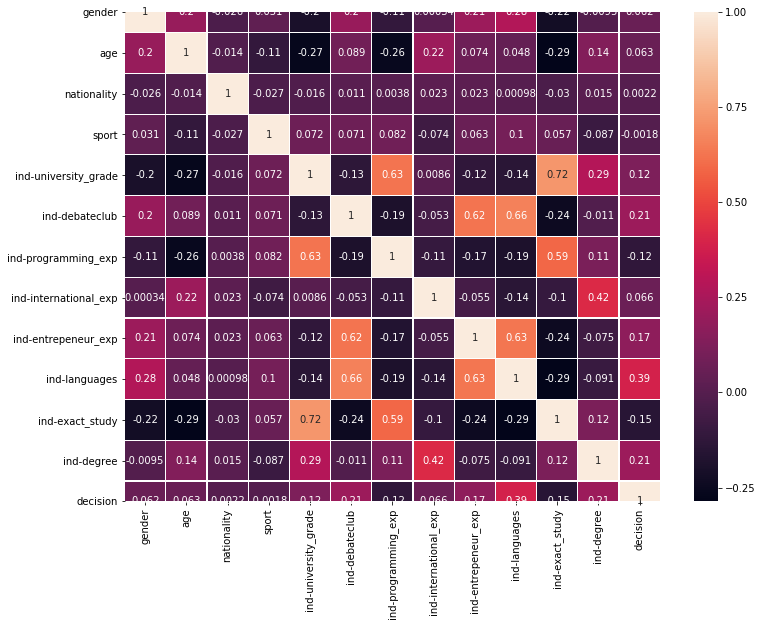

In [367]:
# test what features are most correlated
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.2)
plt.show()

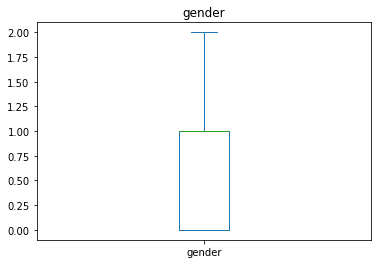

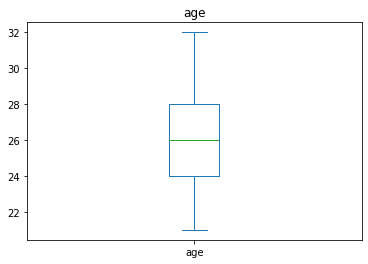

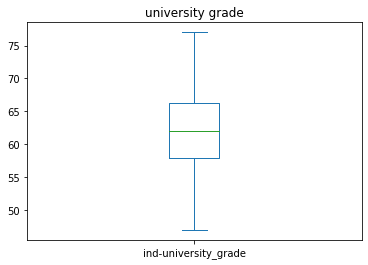

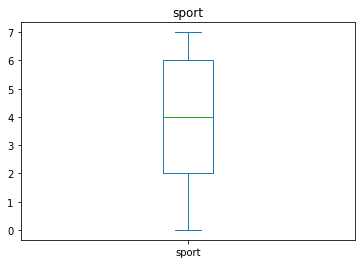

In [353]:
# check for outliers and distribution 
df['gender'].plot(kind='box', title='gender')
plt.show()
df['age'].plot(kind='box', title='age')
plt.show()
df['ind-university_grade'].plot(kind='box', title='university grade')
plt.show()
df['sport'].plot(kind='box', title='sport')
plt.show()




In [407]:
# selectfrommodel selector
def select_sfm(X_train, y_train, X_test, n_features):
    clf = SVR(kernel="linear")
    fs = SelectFromModel(clf, max_features = n_features)
    fs.fit(X_train, y_train)
    print(X_train.columns[fs.get_support()])
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [408]:
# selectKbest selector
def select_skb(X_train, y_train, X_test, n_features):
    fs = SelectKBest(chi2, k = n_features)
    fs.fit(X_train, y_train)
    print(X_train.columns[fs.get_support()])
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [409]:
# RFE selector
def select_rfe(X_train, y_train, X_test, n_features):
    clf = SVR(kernel="linear")
    fs = RFE(estimator=clf, n_features_to_select=n_features, step=1)
    fs.fit(X_train, y_train)
    print(X_train.columns[fs.get_support()])
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [410]:
# https://www.statology.org/sklearn-classification-report/
def evaluation(y_test, y_pred):
    print("-"*20)
    print(classification_report(y_test,y_pred))
    print("-"*20)
    print("\n")

In [400]:
# Random forest classifier, assigned for M1 using indicators
def rfc_default(df, n_features):
    counter = 0
    selector = ['select RFE','select SKB','select SFM' ]
    print('\033[1m'+"-"*30,"random forest classifier with default hyperparameters","-"*30+'\033[0m', "\n")
    for i in [select_rfe, select_skb, select_sfm]:
        X = df.drop(['decision', 'company', 'Id', 'gender', 'nationality', 'sport', 'age'], axis=1)
        y = df.decision
        # split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_fs, X_test_fs, fs = i(X_train, y_train, X_test, n_features)
        
#       'optimal' parameters:
#       {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
#       {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 15, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0})
#       {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'min_samples_split': 2})
#       {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
        ran = RandomForestClassifier()#criterion = auto, max_depth = auto, min_samples_leaf = auto, min_samples_split = auto
        ran.fit(X_train_fs, y_train)
        y_pred = ran.predict(X_test_fs)

        # print the evaluation of the model
        print('\033[1m' + selector[counter] + '\033[0m')

        evaluation(y_test, y_pred)
        counter += 1

# call function with the dataframe and number of features to select
rfc_default(df, 3)



------------------------------ random forest classifier with default hyperparameters ------------------------------ 

Index(['ind-entrepeneur_exp', 'ind-languages', 'ind-degree'], dtype='object')
select RFE
--------------------
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       176
           1       0.66      0.67      0.67       124

    accuracy                           0.72       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

--------------------


Index(['ind-debateclub', 'ind-entrepeneur_exp', 'ind-languages'], dtype='object')
select SKB
--------------------
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       176
           1       0.58      0.36      0.45       124

    accuracy                           0.63       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.62      0.63   

In [391]:
# Bagging classifier, M2 using indicators

def bag_default(df, n_features):
    counter = 0
    selector = ['select RFE','select SKB','select SFM']
    print('\033[1m'+"-"*30,"bagging classifier with default hyperparameters","-"*30+'\033[0m', "\n")
    for i in [select_rfe, select_skb, select_sfm]:
        
        X = df.drop(['decision', 'company', 'Id', 'gender', 'nationality', 'sport', 'age'], axis=1)
        y = df.decision
        # split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_fs, X_test_fs, fs = i(X_train, y_train, X_test, n_features)

#       'Optimal' parameters:
#       Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2})
        bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())
        bag.fit(X_train_fs, y_train)
        y_pred = bag.predict(X_test_fs)

        # print the evaluation of the model
        print('\033[1m' + selector[counter] + '\033[0m')
        evaluation(y_test, y_pred)
        counter += 1
        
# call function with the dataframe and number of features to select
bag_default(df, 3)



------------------------------ bagging classifier with default hyperparameters ------------------------------ 

Index(['ind-entrepeneur_exp', 'ind-languages', 'ind-degree'], dtype='object')
select RFE
--------------------
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       176
           1       0.66      0.67      0.67       124

    accuracy                           0.72       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

--------------------


Index(['ind-debateclub', 'ind-entrepeneur_exp', 'ind-languages'], dtype='object')
select SKB
--------------------
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       176
           1       0.58      0.36      0.45       124

    accuracy                           0.63       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.62      0.63      0.6

In [401]:
# random forest classifier M3 using descriptors

counter =0
selector = ['select RFE','select SKB','select SFM']
print('\033[1m'+"-"*30,"random forest classifier with default hyperparameters","-"*30+'\033[0m', "\n")
X = df.drop(['Id', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'], axis=1)
y = df.decision
for i in [select_rfe, select_skb, select_sfm]:
        # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_fs, X_test_fs, fs = i(X_train, y_train, X_test, 4)
    

#   Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2})
    ran = RandomForestClassifier()
    ran.fit(X_train_fs, y_train)
    y_pred = ran.predict(X_test_fs)

#   print the evaluation of the model
    print('\033[1m' + selector[counter] + '\033[0m')
    evaluation(y_test, y_pred)
    counter+= 1


------------------------------ random forest classifier with default hyperparameters ------------------------------ 

Index(['gender', 'age', 'nationality', 'sport'], dtype='object')
select RFE
--------------------
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       176
           1       0.40      0.43      0.41       124

    accuracy                           0.49       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.50      0.49      0.50       300

--------------------


Index(['gender', 'age', 'nationality', 'sport'], dtype='object')
select SKB
--------------------
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       176
           1       0.40      0.44      0.42       124

    accuracy                           0.49       300
   macro avg       0.49      0.48      0.48       300
weighted avg       0.50      0.49      0.50       300

-----------

In [383]:
params = {
    "criterion":("gini", "entropy"),  
    "max_depth":[2, 4, 6, 8, 10, 12, 15], 
    "min_samples_split":[1, 2, 3, 4, 8] 
#     "min_samples_leaf":[2, 5, 7, 10, 12, 15, 18, 20],
#     "max_leaf_nodes": [1, 3, 5, 8]
    }

y = df['decision']
X = df.drop(['decision', 'company', 'Id', 'gender', 'nationality', 'sport', 'age'], axis=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_fs, X_test_fs, fs = select_rfe(X_train, y_train, X_test, 4)


tree_clf = RandomForestClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=None)
tree_cv.fit(X_train_fs, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
# Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'})



In [342]:
# subgroup analysis for nationality, gender, age M1

# initialise non integer values
female = 0
male = 1
other = 2
German = 0
Dutch = 1
Belgian = 2

# pick bias cases
bias = [[female,'female', Dutch,'Dutch'], [male,'male', Dutch,'Dutch'], [other,'other', Dutch,'Dutch'], 
        [female,'female', Belgian,'Belgian'], [male,'male', Belgian,'Belgian'], [other,'other', Belgian,'Belgian'],
        [female,'female', German, 'German'], [male,'male', German, 'German'], [male, 'male', 24, '24'],
        [female, 'female', 24, '24'], [male, 'male', 28, '28'], [female, 'female', 28, '28'],
        [male, 'male', 32, '32'], [female, 'female', 32, '32']
       ]

m_last = 21
f_last = 21

for i in bias:
    copy = df.copy()
    # pick what bias we are looking at
    if i[3] == 'Dutch' or i[3] == 'Belgian' or i[3] == 'German':
        X = copy[(copy.gender == i[0]) & (copy.nationality == i[2])]
        sync = 'x'
    elif i[1] == 'female':
        X = copy[(copy.gender == i[0]) & (copy.age <= i[2]) & (copy.age >= f_last)]
        sync = 'y'
    elif i[1] == 'male':
        X = copy[(copy.gender == i[0]) & (copy.age <= i[2]) & (copy.age >= m_last)]
        sync = 'z'
    
    y = X.decision
    X = X.drop(['Id', 'company', 'decision'], axis=1 )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # pick model
    ran = RandomForestClassifier()
    ran.fit(X_train, y_train)
    y_pred = ran.predict(X_test)
    # print evaluation
    if sync == 'x':
        print('\033[1m' + i[1], i[3] + '\033[0m')
    elif sync == 'y':
        print('\033[1m' + i[1], str(f_last), i[3] + '\033[0m')
        f_last = i[2]
    elif sync == 'z':
        print('\033[1m' + i[1], str(m_last) ,i[3] + '\033[0m')
        m_last = i[2]
    evaluation(y_test, y_pred)
  




female Dutch
--------------------
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        65
           1       0.50      0.43      0.46        42

    accuracy                           0.61       107
   macro avg       0.58      0.58      0.58       107
weighted avg       0.60      0.61      0.60       107

--------------------


male Dutch
--------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        62
           1       0.83      0.72      0.77        60

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.79      0.79      0.79       122

--------------------


other Dutch
--------------------
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                         

In [384]:
# subgroup analysis for nationality, gender, age M2

female = 0
male = 1
other = 2
German = 0
Dutch = 1
Belgian = 2

bias = [[female,'female', Dutch,'Dutch'], [male,'male', Dutch,'Dutch'], [other,'other', Dutch,'Dutch'], 
        [female,'female', Belgian,'Belgian'], [male,'male', Belgian,'Belgian'], [other,'other', Belgian,'Belgian'],
        [female,'female', German, 'German'], [male,'male', German, 'German'], [male, 'male', 24, '24'],
        [female, 'female', 24, '24'], [male, 'male', 28, '28'], [female, 'female', 28, '28'],
        [male, 'male', 32, '32'], [female, 'female', 32, '32']
       ]

m_last = 21
f_last = 21

for i in bias:
    copy = df.copy()
    if i[3] == 'Dutch' or i[3] == 'Belgian' or i[3] == 'German':
        X = copy[(copy.gender == i[0]) & (copy.nationality == i[2])]
        sync = 'x'
    elif i[1] == 'female':
        X = copy[(copy.gender == i[0]) & (copy.age <= i[2]) & (copy.age >= f_last)]
        sync = 'y'
    elif i[1] == 'male':
        X = copy[(copy.gender == i[0]) & (copy.age <= i[2]) & (copy.age >= m_last)]
        sync = 'z'
    
    y = X.decision
    X = X.drop(['Id', 'company', 'decision'], axis=1 )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    if sync == 'x':
        print('\033[1m' + i[1], i[3] + '\033[0m')
    elif sync == 'y':
        print('\033[1m' + i[1], str(f_last), i[3] + '\033[0m')
        f_last = i[2]
    elif sync == 'z':
        print('\033[1m' + i[1], str(m_last) ,i[3] + '\033[0m')
        m_last = i[2]
    evaluation(y_test, y_pred)
  




female Dutch
--------------------
              precision    recall  f1-score   support

           0       0.70      0.75      0.73        65
           1       0.57      0.50      0.53        42

    accuracy                           0.65       107
   macro avg       0.63      0.63      0.63       107
weighted avg       0.65      0.65      0.65       107

--------------------


male Dutch
--------------------
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        62
           1       0.80      0.62      0.70        60

    accuracy                           0.74       122
   macro avg       0.75      0.74      0.73       122
weighted avg       0.75      0.74      0.73       122

--------------------


other Dutch
--------------------
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                         